# Dask

[![colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/davemlz/spyndex/blob/main/docs/tutorials/dask.ipynb)
![level6](https://raw.githubusercontent.com/davemlz/spyndex/main/docs/_static/level6.png)

It's parallel processing time: Level 6 - `spyndex + dask`!

Remember to install `spyndex`!

In [ ]:
!pip install -U spyndex

Now, let's start!

First, import `spyndex` and `dask`:

In [1]:
import spyndex
import dask

## `dask.Array`

In Level 4 we worked with `xarray` and `DataArrays`. Well, let's do the same tutorial but now working in parallel!

Let's use the `xarray.DataArray` that is stored in the `spyndex` datasets: `sentinel`:

In [2]:
da = spyndex.datasets.open("sentinel")

As you already know, this data array is very simple. We have 3 dimensions: `band`, `x` and `y`. Each band is one of the 10 m spectral bands of a Sentinel-2 image.

In [3]:
da

<xarray.DataArray (band: 4, x: 300, y: 300)>
array([[[ 299,  276,  280, ...,  510,  516,  521],
        [ 287,  285,  284, ...,  503,  476,  469],
        [ 287,  292,  288, ...,  454,  411,  337],
        ...,
        [ 502,  508,  520, ...,  683,  670,  791],
        [ 486,  518,  532, ...,  688,  696,  693],
        [ 486,  506,  515, ...,  659,  671,  664]],

       [[ 469,  446,  466, ...,  695,  711,  728],
        [ 469,  437,  469, ...,  683,  694,  666],
        [ 460,  460,  460, ...,  628,  595,  527],
        ...,
        [ 804,  808,  832, ...,  920,  872, 1023],
        [ 787,  803,  822, ...,  890,  882,  871],
        [ 787,  799,  822, ...,  893,  832,  834]],

       [[ 319,  293,  328, ..., 1054, 1090, 1110],
        [ 327,  318,  345, ..., 1044, 1004,  952],
        [ 339,  355,  323, ...,  922,  784,  652],
        ...,
        [1528, 1516, 1516, ..., 1250, 1246, 1420],
        [1470, 1502, 1498, ..., 1316, 1200, 1162],
        [1394, 1480, 1472, ..., 1288, 1144, 1122]],

       [[2164, 2128, 2206, ..., 1796, 1837, 1816],
        [2110, 2017, 2228, ..., 1795, 1839, 1788],
        [2050, 2112, 2062, ..., 1816, 1789, 1864],
        ...,
        [1910, 1942, 1942, ..., 2105, 1898, 2102],
        [1836, 1874, 1916, ..., 2075, 1792, 1747],
        [1778, 1844, 1870, ..., 2087, 1830, 1675]]])
Coordinates:
  * band     (band) <U3 'B02' 'B03' 'B04' 'B08'
Dimensions without coordinates: x, y

The data is stored as `int16`, so let's convert everything to `float`. The scale: 10000.

In [4]:
da = da / 10000

You can easily visualize the image with `rasterio`:

In [5]:
from rasterio import plot

Let's see the RGB visualization:

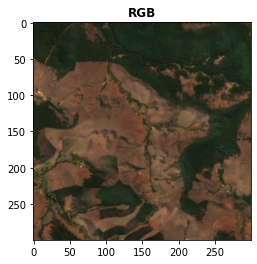

<AxesSubplot:title={'center':'RGB'}>

In [6]:
plot.show((da.sel(band = ["B04","B03","B02"]).data / 0.3).clip(0,1),title = "RGB")

Great! Everything is going great!

Now, let's convert our normal `xarray.DataArray` to a rechunked one:

In [8]:
da = da.chunk({"band":1,"x":100,"y":100})

Let's see what we have:

In [9]:
da

<xarray.DataArray (band: 4, x: 300, y: 300)>
dask.array<xarray-<this-array>, shape=(4, 300, 300), dtype=float64, chunksize=(1, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * band     (band) <U3 'B02' 'B03' 'B04' 'B08'
Dimensions without coordinates: x, y

Nice! Now let's compute the `NDVI`:

In [11]:
NDVI = spyndex.computeIndex("NDVI",{"N": da.sel(band = "B08"),"R": da.sel(band = "B04")})

Let's check our result:

In [12]:
NDVI

<xarray.DataArray (x: 300, y: 300)>
dask.array<truediv, shape=(300, 300), dtype=float64, chunksize=(100, 100), chunktype=numpy.ndarray>
Dimensions without coordinates: x, y

It's a chunked `xarray.DataArray`! This means that it is not computed yet, so let's compute it!

In [13]:
NDVI = NDVI.compute()

Now, if we take a look at our `NDVI`, you'll see that it is already computed! And it was done in parallel with `dask`!

In [14]:
NDVI

<xarray.DataArray (x: 300, y: 300)>
array([[0.74305276, 0.75795126, 0.74112076, ..., 0.26035088, 0.25521011,
        0.24128503],
       [0.73163726, 0.72762313, 0.73183055, ..., 0.26452976, 0.29370383,
        0.30510949],
       [0.71619925, 0.71220105, 0.72914046, ..., 0.3265157 , 0.39059464,
        0.48171701],
       ...,
       [0.11111111, 0.1231926 , 0.1231926 , ..., 0.25484352, 0.20737913,
        0.19363998],
       [0.1107078 , 0.11018957, 0.12243702, ..., 0.22382778, 0.19786096,
        0.20110003],
       [0.12105927, 0.10950662, 0.11909037, ..., 0.23674074, 0.23066577,
        0.19771183]])
Dimensions without coordinates: x, y

Let's visualize it!

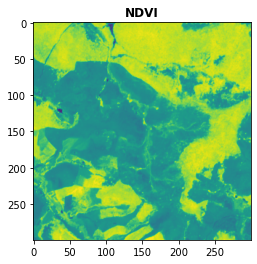

<AxesSubplot:title={'center':'NDVI'}>

In [15]:
plot.show(NDVI,title = "NDVI")

Amazing!

## `dask.Series`

In Level 3 we worked with `pandas.Series`. Well, let's do the same tutorial but now working in parallel again!

Let's use the `pandas.DataFrame` that is stored in the `spyndex` datasets: `spectral`:

In [31]:
df = spyndex.datasets.open("spectral")

As you already know, each column of this dataset is the Surface Reflectance from Landsat 8 for 3 different classes. The samples were taken over Oporto:

In [32]:
df.head()

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,ST_B10,class
0,0.089850,0.100795,0.132227,0.165764,0.269054,0.306206,0.251949,297.328396,Urban
1,0.073859,0.086990,0.124404,0.160979,0.281264,0.267596,0.217917,297.107934,Urban
2,0.072938,0.086028,0.120994,0.140203,0.284220,0.258384,0.200098,297.436064,Urban
3,0.087733,0.103916,0.135981,0.163976,0.254479,0.259580,0.216735,297.203638,Urban
4,0.090593,0.109306,0.150350,0.181260,0.269535,0.273234,0.219554,297.097680,Urban


Here you can see the classes stored in the `class` column:

In [33]:
df["class"].unique()

array(['Urban', 'Water', 'Vegetation'], dtype=object)

Each column of the data frame is a `pandas.Series` data type:

In [34]:
type(df["SR_B2"])

pandas.core.series.Series

Everything great, right?

Now, let's create a `dask` data frame:

In [35]:
df = dask.dataframe.from_pandas(df,npartitions = 10)

Let's see what we have:

In [36]:
df

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,ST_B10,class
npartitions=10,,,,,,,,,
0,float64,float64,float64,float64,float64,float64,float64,float64,object
109,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...
89,...,...,...,...,...,...,...,...,...
99,...,...,...,...,...,...,...,...,...


That's a `dask` data frame! Now, let's compute our indices!

In [37]:
indicesToCompute = ["NDVI","NDWI","NDBI"]

Ready?... Go!

In [38]:
df[indicesToCompute] = spyndex.computeIndex(
    index = indicesToCompute,
    params = {
        "G": df["SR_B3"],
        "R": df["SR_B4"],
        "N": df["SR_B5"],
        "S1": df["SR_B6"],
    }
)

Let's see our result!

In [39]:
df

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,ST_B10,class,NDVI,NDWI,NDBI
npartitions=10,,,,,,,,,,,,
0,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64
109,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...
89,...,...,...,...,...,...,...,...,...,...,...,...
99,...,...,...,...,...,...,...,...,...,...,...,...


Our result is also a `dask` data frame! Now, just as we did with the chunked `xarray.DataArray`, we have to actually compute our indices!

In [40]:
df = df.compute()

Now, let's see what we have:

In [41]:
df.head()

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,SR_B6,SR_B7,ST_B10,class,NDVI,NDWI,NDBI
0,0.089850,0.100795,0.132227,0.165764,0.269054,0.306206,0.251949,297.328396,Urban,0.237548,-0.340973,0.064584
1,0.073859,0.086990,0.124404,0.160979,0.281264,0.267596,0.217917,297.107934,Urban,0.271989,-0.386671,-0.024902
10,0.109801,0.124184,0.166369,0.202229,0.317330,0.314731,0.237525,298.668260,Urban,0.221537,-0.312098,-0.004112
100,0.022805,0.026105,0.051735,0.034822,0.255455,0.114627,0.054650,291.818548,Vegetation,0.760074,-0.663173,-0.380530
101,0.021856,0.024345,0.050635,0.034341,0.270058,0.118175,0.052354,291.423766,Vegetation,0.774367,-0.684215,-0.391215


OUR INDICES! COMPUTED IN PARALLEL! :D

Let's visualize them!

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

Define some colors for each one of the classes:

In [43]:
colors = ["#E33F62","#3FDDE3","#4CBA4B"]

Now, let's create our gorgeous pair grid!

<Figure size 1080x1080 with 0 Axes>

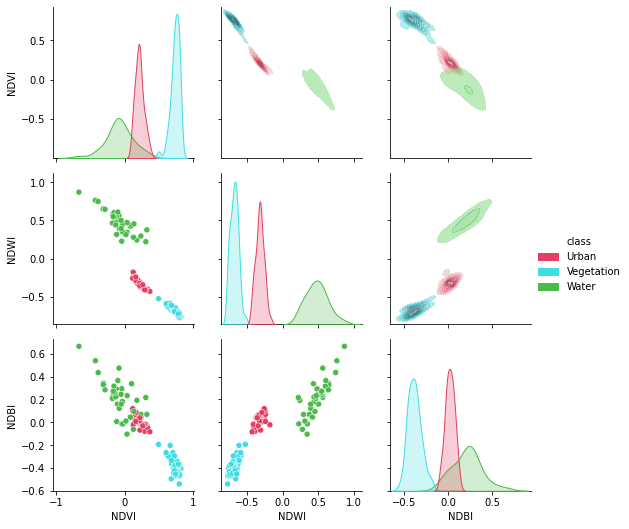

In [44]:
plt.figure(figsize = (15,15))
g = sns.PairGrid(df[['NDVI', 'NDWI', 'NDBI','class']],hue = "class",palette = sns.color_palette(colors))
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot,fill = True,alpha = .5)
g.map_diag(sns.kdeplot,fill = True)
g.add_legend()
plt.show()

Splendid!